In [1]:
import FinanceDataReader as fdr
import os, re
import pandas as pd
import numpy as np
import datetime as dt
import sweetviz as sv
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df1['QQQ'] = fdr.DataReader('QQQ', '2020-03-19')['Close']
df1 = df1 / df1.iloc[0].item() * 100
                        
df2['ITA'] = fdr.DataReader('ITA', '2020-03-19')['Close']
df2 = df2 / df2.iloc[0].item() * 100
                        
df3['BDRY'] = fdr.DataReader('BDRY', '2020-03-19')['Close']
df3 = df3 / df3.iloc[0].item() * 100

df4['PHG'] = fdr.DataReader('PHG', '2020-03-19')['Close']
df4 = df4 / df4.iloc[0].item() * 100

df5['SOXX'] = fdr.DataReader('SOXX', '2020-03-19')['Close']
df5 = df5 / df5.iloc[0].item() * 100

In [3]:
df = pd.concat([df1, df2, df3, df4, df5], axis=1)
df

,QQQ,ITA,BDRY,PHG,SOXX
Date,,,,,
2020-03-19,100.000000,100.000000,100.000000,100.000000,100.000000
2020-03-20,96.082405,96.192449,104.676259,92.188841,97.151342
2020-03-23,95.947315,93.611598,103.237410,93.648069,100.621425
2020-03-24,103.377237,105.113908,96.582734,99.513591,111.504619
2020-03-25,102.611730,115.150550,90.467626,103.433476,109.673339
...,...,...,...,...,...
2022-04-12,191.067207,176.294408,382.733813,83.662375,230.262868
2022-04-13,194.951030,177.823801,382.014388,84.463519,235.217774
2022-04-14,190.493077,178.301736,398.561151,83.719599,228.712055


In [4]:
index_01 = pd.DataFrame()
index_01['SimSimHanBalanceIndex'] = pd.DataFrame(df.sum(axis=1)) / 5
index_01

,SimSimHanBalanceIndex
Date,
2020-03-19,100.000000
2020-03-20,97.258259
2020-03-23,97.413163
2020-03-24,103.218418
2020-03-25,104.267344
...,...
2022-04-12,212.804134
2022-04-13,214.894103
2022-04-14,215.957524


In [5]:
SP500 = pd.DataFrame()
SP500['S&P500'] = pd.DataFrame(fdr.DataReader('SPX', '2020-03-19')['Close'])

SP500 = SP500 / SP500.iloc[0].item() * 100
show = pd.concat([index_01, SP500], axis=1)

show

,SimSimHanBalanceIndex,S&P500
Date,,
2020-03-19,100.000000,100.000000
2020-03-20,97.258259,101.289926
2020-03-23,97.413163,95.638821
2020-03-24,103.218418,105.098280
2020-03-25,104.267344,104.238329
...,...,...
2022-04-12,212.804134,152.457002
2022-04-13,214.894103,153.439803
2022-04-14,215.957524,154.914005


<AxesSubplot:xlabel='Date'>

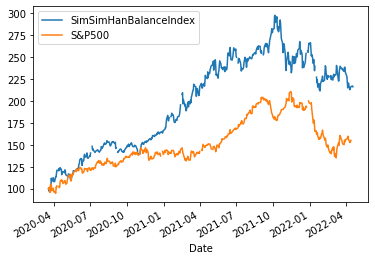

In [6]:
show.plot()

In [7]:
df_analyze = pd.concat([df, SP500], axis=1)
df_analyze

,QQQ,ITA,BDRY,PHG,SOXX,S&P500
Date,,,,,,
2020-03-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-03-20,96.082405,96.192449,104.676259,92.188841,97.151342,101.289926
2020-03-23,95.947315,93.611598,103.237410,93.648069,100.621425,95.638821
2020-03-24,103.377237,105.113908,96.582734,99.513591,111.504619,105.098280
2020-03-25,102.611730,115.150550,90.467626,103.433476,109.673339,104.238329
...,...,...,...,...,...,...
2022-04-12,191.067207,176.294408,382.733813,83.662375,230.262868,152.457002
2022-04-13,194.951030,177.823801,382.014388,84.463519,235.217774,153.439803
2022-04-14,190.493077,178.301736,398.561151,83.719599,228.712055,154.914005


In [8]:
report = sv.analyze(df_analyze)
report.show_html('./SimSimHanBalanceIndex.html')

                                             |                                             | [  0%]   00:00 ->…

C:\Users\chanw\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\chanw\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\chanw\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\chanw\anaconda3\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is dep

Report ./SimSimHanBalanceIndex.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
